# ***Install Requirements***


In [1]:
!pip3 install git+https://github.com/ultralytics/ultralytics.git
!pip3 install kaggle opendatasets

  Cloning https://github.com/ultralytics/ultralytics.git to /tmp/pip-req-build-4schb0hq
  Running command git clone --filter=blob:none --quiet https://github.com/ultralytics/ultralytics.git /tmp/pip-req-build-4schb0hq
  Resolved https://github.com/ultralytics/ultralytics.git to commit 4e4aefff3eacab511cacbaf68c8ce2a3181a5087
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for ultralytics: filename=ultralytics-8.3.239-py3-none-any.whl size=1147495 sha256=6f18c023838ca0484e8bd0e173e4fc8acf8c7cf32c6d28c6f579e9a873b4e6fe
  Stored in directory: /tmp/pip-ephem-wheel-cache-xxyey0qx/wheels/07/0b/e8/a9b200841fd9259dec61e092d35594d5de8f3412e26e53cb4d
Successfully built ultralytics


# **Download Dataset**
Yoga pose image dataset from kaggle public dataset https://www.kaggle.com/datasets/ujjwalchowdhury/yoga-pose-classification this use 5 yoga pose

In [6]:
import opendatasets as od

od.download(
    'https://www.kaggle.com/datasets/ujjwalchowdhury/yoga-pose-classification'
)


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: hiuhonguynngc
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/ujjwalchowdhury/yoga-pose-classification


100%|██████████| 15.0M/15.0M [00:00<00:00, 813MB/s]

# **Yolov8 Pose**

In [7]:
!ls /content/yoga-pose-classification/YogaPoses

Downdog  Goddess  Plank  Tree  Warrior2


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.

0: 480x640 1 person, 1986.4ms
Speed: 21.2ms preprocess, 1986.4ms inference, 59.4ms postprocess per image at shape (1, 3, 480, 640)


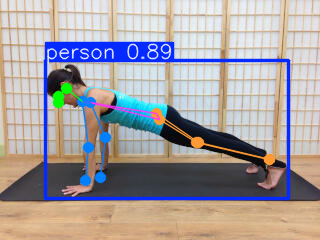

In [8]:
import cv2
from PIL import Image
from pydantic import BaseModel

import ultralytics

model = ultralytics.YOLO(model='yolov8m-pose.pt')

image = cv2.imread('/content/yoga-pose-classification/YogaPoses/Plank/00000006.jpg')
result = model.predict(image, save=False)[0]
result_keypoint = result.keypoints.xyn.cpu().numpy()[0]
result.boxes.xyxy

result.keypoints[0]

Image.fromarray(cv2.cvtColor(result.plot(), cv2.COLOR_BGR2RGB))

# Generate Dataset

## Keypoint extract

Yolov8 pose estimation memiliki 17 keypoint

* NOSE: int = 0
* LEFT_EYE: int = 1
* RIGHT_EYE: int = 2
* LEFT_EAR: int = 3
* RIGHT_EAR: int = 4
* LEFT_SHOULDER: int = 5
* RIGHT_SHOULDER: int = 6
* LEFT_ELBOW: int = 7
* RIGHT_ELBOW: int = 8
* LEFT_WRIST: int = 9
* RIGHT_WRIST: int = 10
* LEFT_HIP: int = 11
* RIGHT_HIP: int = 12
* LEFT_KNEE: int = 13
* RIGHT_KNEE: int = 14
* LEFT_ANKLE: int = 15
* RIGHT_ANKLE: int = 16

In [9]:
class GetKeypoint(BaseModel):
    NOSE:           int = 0
    LEFT_EYE:       int = 1
    RIGHT_EYE:      int = 2
    LEFT_EAR:       int = 3
    RIGHT_EAR:      int = 4
    LEFT_SHOULDER:  int = 5
    RIGHT_SHOULDER: int = 6
    LEFT_ELBOW:     int = 7
    RIGHT_ELBOW:    int = 8
    LEFT_WRIST:     int = 9
    RIGHT_WRIST:    int = 10
    LEFT_HIP:       int = 11
    RIGHT_HIP:      int = 12
    LEFT_KNEE:      int = 13
    RIGHT_KNEE:     int = 14
    LEFT_ANKLE:     int = 15
    RIGHT_ANKLE:    int = 16

get_keypoint = GetKeypoint()


In [10]:
import os
import glob

dataset_root = '/content/yoga-pose-classification/YogaPoses'
pose_list = os.listdir(dataset_root)
pose_list

['Plank', 'Downdog', 'Goddess', 'Warrior2', 'Tree']

In [11]:
def extract_keypoint(keypoint):
    # nose
    nose_x, nose_y = keypoint[get_keypoint.NOSE]
    # eye
    left_eye_x, left_eye_y = keypoint[get_keypoint.LEFT_EYE]
    right_eye_x, right_eye_y = keypoint[get_keypoint.RIGHT_EYE]
    # ear
    left_ear_x, left_ear_y = keypoint[get_keypoint.LEFT_EAR]
    right_ear_x, right_ear_y = keypoint[get_keypoint.RIGHT_EAR]
    # shoulder
    left_shoulder_x, left_shoulder_y = keypoint[get_keypoint.LEFT_SHOULDER]
    right_shoulder_x, right_shoulder_y = keypoint[get_keypoint.RIGHT_SHOULDER]
    # elbow
    left_elbow_x, left_elbow_y = keypoint[get_keypoint.LEFT_ELBOW]
    right_elbow_x, right_elbow_y = keypoint[get_keypoint.RIGHT_ELBOW]
    # wrist
    left_wrist_x, left_wrist_y = keypoint[get_keypoint.LEFT_WRIST]
    right_wrist_x, right_wrist_y = keypoint[get_keypoint.RIGHT_WRIST]
    # hip
    left_hip_x, left_hip_y = keypoint[get_keypoint.LEFT_HIP]
    right_hip_x, right_hip_y = keypoint[get_keypoint.RIGHT_HIP]
    # knee
    left_knee_x, left_knee_y = keypoint[get_keypoint.LEFT_KNEE]
    right_knee_x, right_knee_y = keypoint[get_keypoint.RIGHT_KNEE]
    # ankle
    left_ankle_x, left_ankle_y = keypoint[get_keypoint.LEFT_ANKLE]
    right_ankle_x, right_ankle_y = keypoint[get_keypoint.RIGHT_ANKLE]

    return [
        nose_x, nose_y,
        left_eye_x, left_eye_y,
        right_eye_x, right_eye_y,
        left_ear_x, left_ear_y,
        right_ear_x, right_ear_y,
        left_shoulder_x, left_shoulder_y,
        right_shoulder_x, right_shoulder_y,
        left_elbow_x, left_elbow_y,
        right_elbow_x, right_elbow_y,
        left_wrist_x, left_wrist_y,
        right_wrist_x, right_wrist_y,
        left_hip_x, left_hip_y,
        right_hip_x, right_hip_y,
        left_knee_x, left_knee_y,
        right_knee_x, right_knee_y,
        left_ankle_x, left_ankle_y,
        right_ankle_x, right_ankle_y
    ]

# Run image

In [12]:
dataset_csv = []
for pose in pose_list:
    image_path_list = glob.glob(f'{dataset_root}/{pose}/*.jpg')
    for image_path in image_path_list:
        # get image_name
        image_name = image_path.split('/')[-1]
        # read numpy image
        image = cv2.imread(image_path)
        # get height width image
        height, width = image.shape[:2]

        # detect pose using yolov8-pose
        results = model.predict(image, save=False)[0]
        results_keypoint = results.keypoints.xyn.cpu().numpy()
        for result_keypoint in results_keypoint:
            if len(result_keypoint) == 17:
                keypoint_list = extract_keypoint(result_keypoint)

                # inset image_name, labe] in index 0,1
                keypoint_list.insert(0, image_name)
                keypoint_list.insert(1, pose)
                dataset_csv.append(keypoint_list)


0: 480x640 1 person, 1057.0ms
Speed: 3.7ms preprocess, 1057.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 448x640 1 person, 1001.3ms
Speed: 3.2ms preprocess, 1001.3ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)

0: 384x640 1 person, 907.1ms
Speed: 3.8ms preprocess, 907.1ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 288x640 1 person, 892.4ms
Speed: 2.9ms preprocess, 892.4ms inference, 1.2ms postprocess per image at shape (1, 3, 288, 640)

0: 448x640 1 person, 1638.2ms
Speed: 4.8ms preprocess, 1638.2ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)

0: 640x480 1 person, 1255.9ms
Speed: 6.1ms preprocess, 1255.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 480)

0: 448x640 1 person, 1018.4ms
Speed: 3.7ms preprocess, 1018.4ms inference, 0.9ms postprocess per image at shape (1, 3, 448, 640)

0: 480x640 1 person, 1104.6ms
Speed: 3.4ms preprocess, 1104.6ms inference, 3.0ms postprocess 

In [13]:
import csv
# write csv
header = [
    'image_name',
    'label',
    # nose
    'nose_x',
    'nose_y',
    # left eye
    'left_eye_x',
    'left_eye_y',
    # right eye
    'right_eye_x',
    'right_eye_y',
    # left ear
    'left_ear_x',
    'left_ear_y',
    # right ear
    'right_ear_x',
    'right_ear_y',
    # left shoulder
    'left_shoulder_x',
    'left_shoulder_y',
    # right sholder
    'right_shoulder_x',
    'right_shoulder_y',
    # left elbow
    'left_elbow_x',
    'left_elbow_y',
    # rigth elbow
    'right_elbow_x',
    'right_elbow_y',
    # left wrist
    'left_wrist_x',
    'left_wrist_y',
    # right wrist
    'right_wrist_x',
    'right_wrist_y',
    # left hip
    'left_hip_x',
    'left_hip_y',
    # right hip
    'right_hip_x',
    'right_hip_y',
    # left knee
    'left_knee_x',
    'left_knee_y',
    # right knee
    'right_knee_x',
    'right_knee_y',
    # left ankle
    'left_ankle_x',
    'left_ankle_y',
    # right ankle
    'right_ankle_x',
    'right_ankle_y'
]

with open('yoga_pose_keypoint.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)

    # write the header
    writer.writerow(header)

    # write multiple rows
    writer.writerows(dataset_csv)


# Write Dataset

In [14]:
import pandas as pd

df = pd.read_csv('yoga_pose_keypoint.csv')
df = df.drop('image_name', axis=1)
df.head()

,label,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
0,Plank,0.889726,0.319828,0.896090,0.300050,0.889311,0.289205,0.861508,0.242114,0.846272,...,0.524777,0.416547,0.324024,0.513244,0.280409,0.527575,0.110731,0.533114,0.106316,0.574314
1,Plank,0.271321,0.511721,0.274008,0.494712,0.273179,0.494981,0.294367,0.474510,0.296933,...,0.492471,0.566677,0.599380,0.663516,0.590088,0.653697,0.745053,0.716174,0.728279,0.715454
2,Plank,0.831458,0.719375,0.835480,0.694919,0.830839,0.685418,0.800614,0.655420,0.791249,...,0.519562,0.702499,0.329020,0.780844,0.335342,0.826279,0.193420,0.750321,0.177222,0.816368
3,Plank,0.153474,0.533421,0.150308,0.488265,0.150368,0.511343,0.166821,0.395625,0.183579,...,0.509540,0.621227,0.711515,0.758005,0.687603,0.728425,0.873844,0.645992,0.871684,0.612237
4,Plank,0.821721,0.542132,0.824845,0.525722,0.822234,0.515665,0.788268,0.492430,0.784964,...,0.460861,0.615162,0.309799,0.735454,0.278774,0.752670,0.147145,0.723171,0.125847,0.750312
